# Swipe Data

Seperate table per servery (south, baker, siebel, north, west)

cols: time (15 min intervals), swipes

In [3]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [4]:
def generate_random(start_time, end_time):
    times = pd.date_range(start=start_time, end=end_time, freq='15min')
    # have a check such that times are between 7:30am to 8:00pm
    times = times[(times.time >= pd.Timestamp('07:30:00').time()) & 
                  (times.time <= pd.Timestamp('20:00:00').time())]

    #swipes = [random.randint(3500, 4000) for _ in range(len(times))]
    swipes = []
    for time in times:
        if time.weekday() >= 5:  # Weekend
            swipe_count = random.randint(2000, 3500)
        elif time.time() >= pd.Timestamp('11:30:00').time() and time.time() <= pd.Timestamp('13:30:00').time():  # Lunch time
            swipe_count = random.randint(3500, 4000)
        elif time.time() >= pd.Timestamp('17:30:00').time() and time.time() <= pd.Timestamp('19:30:00').time():  # Dinner time
            swipe_count = random.randint(3750, 4200)
        else:  # Other times
            swipe_count = random.randint(2000, 4000)
        swipes.append(swipe_count)
    
    # Create a DataFrame
    df = pd.DataFrame({
        'time': times,
        'swipes': swipes
    })
    
    return df

south_df = generate_random('2025-01-01 00:00:00', '2025-03-01 03:00:00')
south_df

,time,swipes
0,2025-01-01 07:30:00,2507
1,2025-01-01 07:45:00,2755
2,2025-01-01 08:00:00,3510
3,2025-01-01 08:15:00,3193
4,2025-01-01 08:30:00,2435
...,...,...
3004,2025-02-28 19:00:00,3881
3005,2025-02-28 19:15:00,3799
3006,2025-02-28 19:30:00,3940
3007,2025-02-28 19:45:00,3719


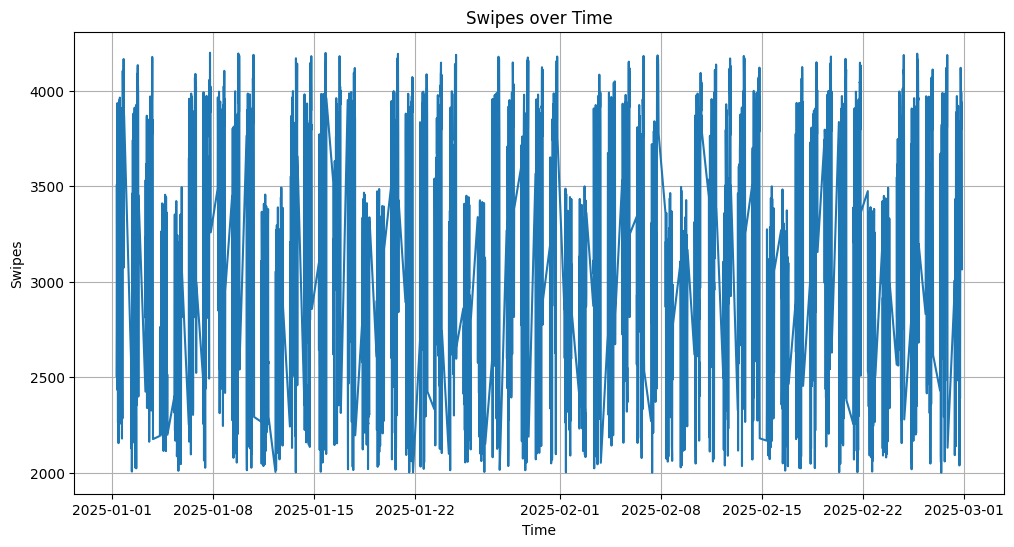

In [5]:
# visualizations
plt.figure(figsize=(12, 6))
plt.plot(south_df['time'], south_df['swipes'], label='Swipes')
plt.xlabel('Time')
plt.ylabel('Swipes')
plt.title('Swipes over Time')
plt.grid(True)
plt.show()


ADF Statistic (Original): -4.9502
p-value (Original): 0.0000
Interpretation: The original series is Stationary.

ADF Statistic (Differenced): -23.3310
p-value (Differenced): 0.0000
Interpretation: The differenced series is Stationary.


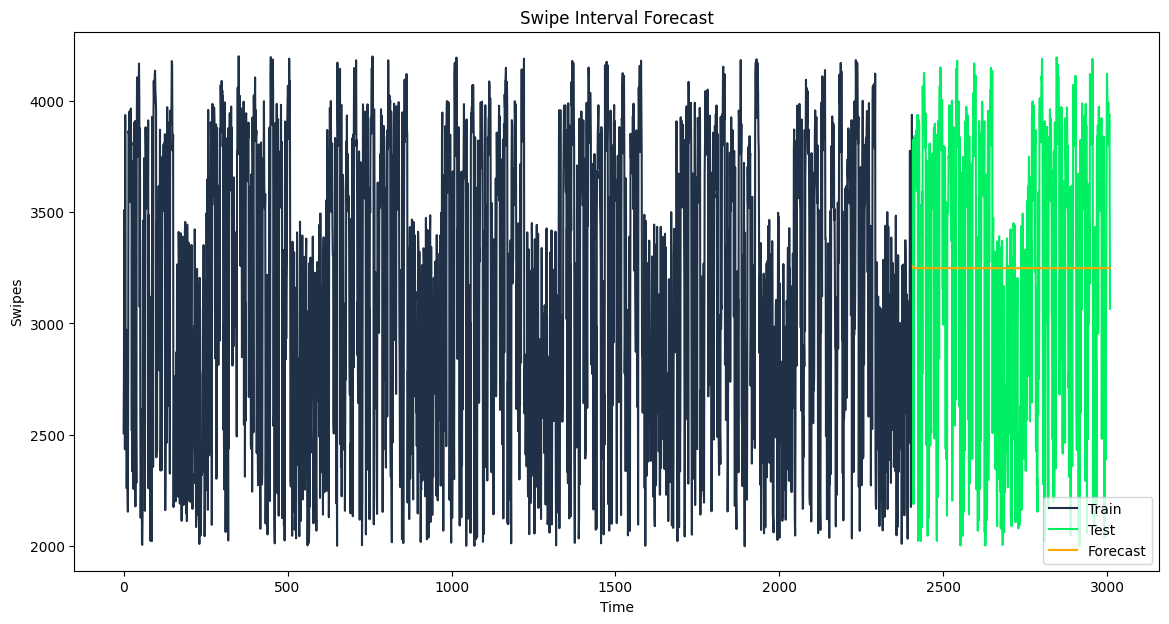

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


# 2. Conduct stationarity tests
data = south_df['swipes']

result_original = adfuller(data.dropna())
print(f"ADF Statistic (Original): {result_original[0]:.4f}")
print(f"p-value (Original): {result_original[1]:.4f}")
if result_original[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

data_diff = data.diff().dropna()
result_diff = adfuller(data_diff)
print(f"ADF Statistic (Differenced): {result_diff[0]:.4f}")
print(f"p-value (Differenced): {result_diff[1]:.4f}")
if result_diff[1] < 0.05:
    print("Interpretation: The differenced series is Stationary.")
else:
    print("Interpretation: The differenced series is Non-Stationary.")

# 3. Train/test split
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

train.index = south_df.index[:train_size]
test.index = south_df.index[train_size:]


# 4. Fit ARIMA model on the train set
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

# 5. Forecast and create a Series that keeps the datetime index of test
forecast_values = model_fit.forecast(steps=len(test))
forecast_series = pd.Series(forecast_values, index=south_df.index)

# 6. Plot
plt.figure(figsize=(14,7))
plt.plot(train.index, train, label='Train', color='#203147')
plt.plot(test.index, test, label='Test', color='#01ef63')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='orange')
plt.title('Swipe Interval Forecast')
plt.xlabel('Time')
plt.ylabel('Swipes')
plt.legend()
plt.show()
